# EDA

## Importacion de librerias


In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from src.data import carga_original
from src.data import limpiar_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re




## Carga de corpus linguistico


In [2]:
df = carga_original()
df.head()

,Song,Song year,Artist,Genre,Lyrics,Track_id
0,craftsmanship,2005,buck-65,Hip-Hop,Most folks spend their days daydreaming of fin...,8294
1,come-on-out,2012,the-elwins,Indie,Take your cold hands and put them on my face\n...,21621
2,riot,2013,bullet-for-my-valentine,Metal,Are you ready it's time for war\nWe'll break d...,3301
3,that-s-what-girls-do,2007,dream-street,Pop,You ask me why I change the color of my hair\n...,2773
4,believe-in-a-dollar,2012,cassidy,Hip-Hop,Do you believe in magic in a young girl's hear...,16797


## Limpieza de datos

In [3]:
df.isnull().sum()#sin valores nulos

Song         0
Song year    0
Artist       0
Genre        0
Lyrics       0
Track_id     0
dtype: int64

In [4]:
df=limpiar_dataset(df)

In [5]:
df.head()

,Song,Song year,Artist,Genre,Lyrics
0,craftsmanship,2005,buck-65,Hip-Hop,Most folks spend their days daydreaming of fin...
1,come-on-out,2012,the-elwins,Indie,Take your cold hands and put them on my face S...
2,riot,2013,bullet-for-my-valentine,Metal,Are you ready its time for war Well break down...
3,that-s-what-girls-do,2007,dream-street,Pop,You ask me why I change the color of my hair Y...
4,believe-in-a-dollar,2012,cassidy,Hip-Hop,Do you believe in magic in a young girls heart...


Filas del nuevo df: 7936

# Visualizaciones


## Análisis de variables categóricas

### Distribución de géneros musicales

C:\Users\kenda\AppData\Local\Temp\ipykernel_33864\4280051449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


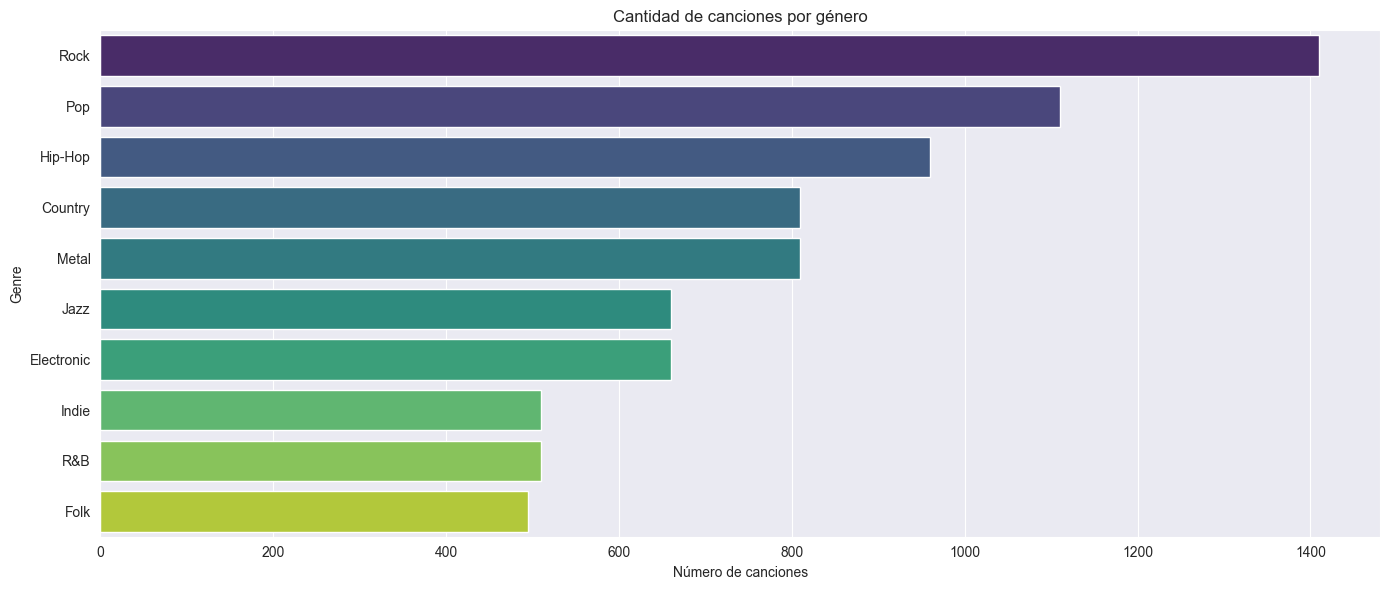

In [6]:
plt.figure(figsize=(14,6))
genre_counts = df['Genre'].value_counts()
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Cantidad de canciones por género')
plt.xlabel('Número de canciones')
plt.tight_layout()
plt.show()

### Distribución de artistas (top 20)

C:\Users\kenda\AppData\Local\Temp\ipykernel_33864\1262427026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='mako')


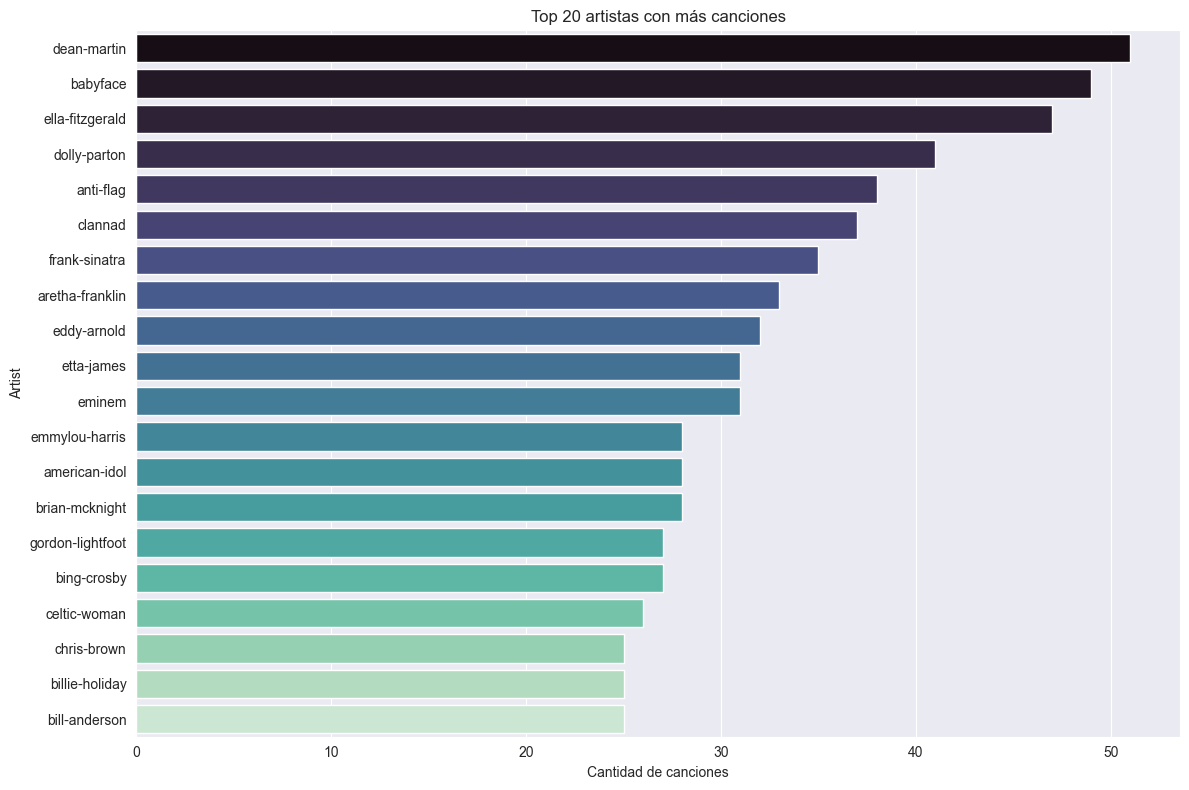

In [7]:
top_artists = df['Artist'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='mako')
plt.title('Top 20 artistas con más canciones')
plt.xlabel('Cantidad de canciones')
plt.tight_layout()
plt.show()

### Distribución de años de las canciones

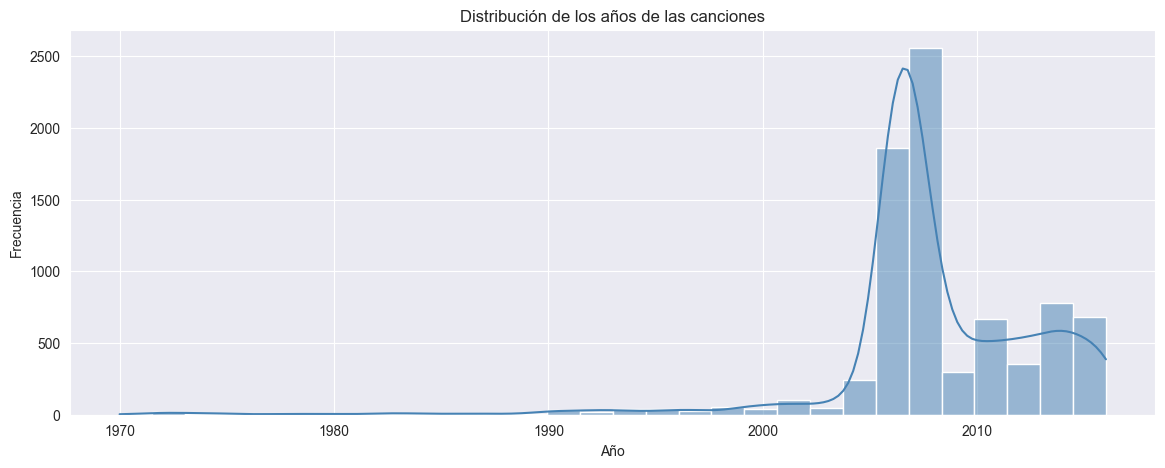

In [8]:
plt.figure(figsize=(14,5))
sns.histplot(df['Song year'], bins=30, kde=True, color='steelblue')
plt.title('Distribución de los años de las canciones')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

### Visualizacion por decadas

C:\Users\kenda\AppData\Local\Temp\ipykernel_33864\2563062628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decade_counts.index, y=decade_counts.values, palette='rocket')


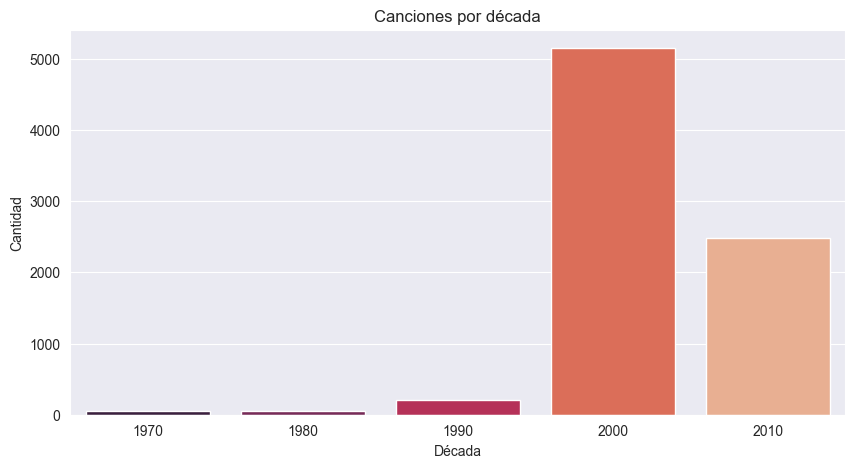

In [9]:
df['Decade'] = (df['Song year'] // 10) * 10
decade_counts = df['Decade'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.barplot(x=decade_counts.index, y=decade_counts.values, palette='rocket')
plt.title('Canciones por década')
plt.xlabel('Década')
plt.ylabel('Cantidad')
plt.show()

### Longitud de letras


count    7935.000000
mean      243.293636
std       160.388262
min        44.000000
25%       140.000000
50%       200.000000
75%       291.000000
max      2387.000000
Name: Lyrics_length, dtype: float64


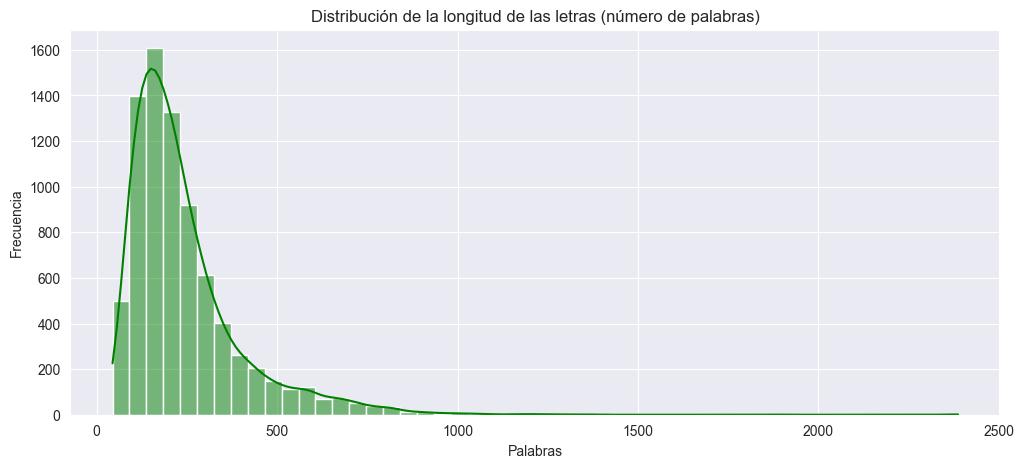

In [10]:
df['Lyrics_length'] = df['Lyrics'].apply(lambda x: len(str(x).split()))


print(df['Lyrics_length'].describe())


plt.figure(figsize=(12,5))
sns.histplot(df['Lyrics_length'], bins=50, kde=True, color='green')
plt.title('Distribución de la longitud de las letras (número de palabras)')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

### Diferencias entre letras

C:\Users\kenda\AppData\Local\Temp\ipykernel_33864\2501134450.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Genre', y='Lyrics_length', palette='Set2')


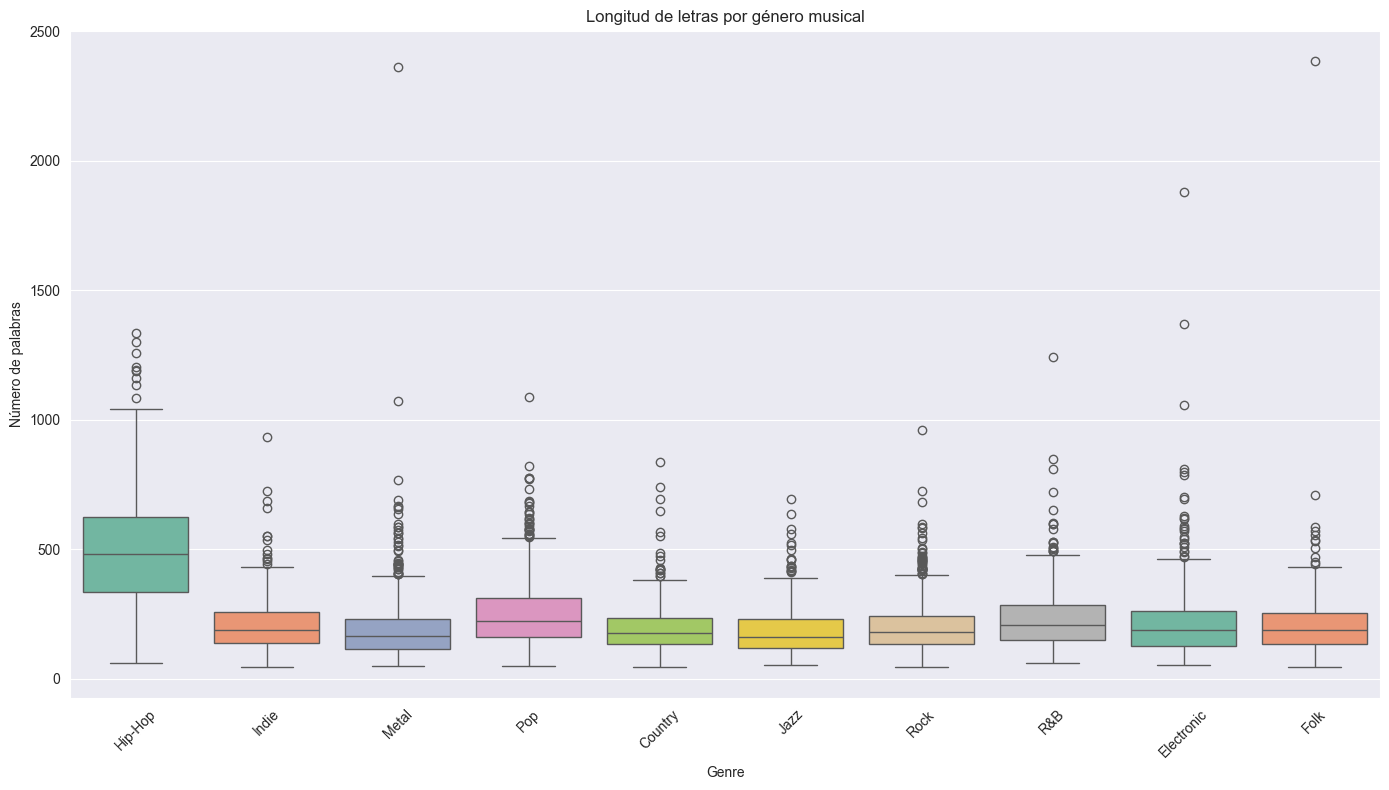

In [11]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df, x='Genre', y='Lyrics_length', palette='Set2')
plt.title('Longitud de letras por género musical')
plt.xticks(rotation=45)
plt.ylabel('Número de palabras')
plt.tight_layout()
plt.show()

### Relaciones entre variables numéricas

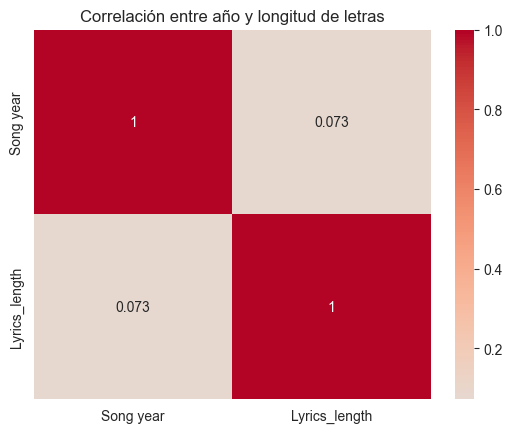

In [12]:
corr = df[['Song year', 'Lyrics_length']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre año y longitud de letras')
plt.show()

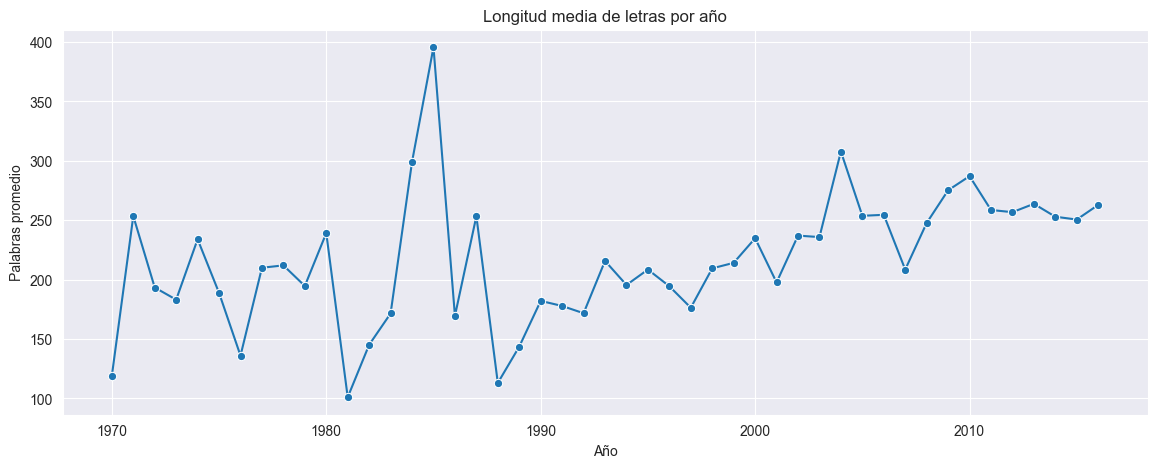

In [13]:
avg_len_per_year = df.groupby('Song year')['Lyrics_length'].mean().reset_index()
plt.figure(figsize=(14,5))
sns.lineplot(data=avg_len_per_year, x='Song year', y='Lyrics_length', marker='o')
plt.title('Longitud media de letras por año')
plt.xlabel('Año')
plt.ylabel('Palabras promedio')
plt.grid(True)
plt.show()

### Valores atipicos entre song year y lyrics length

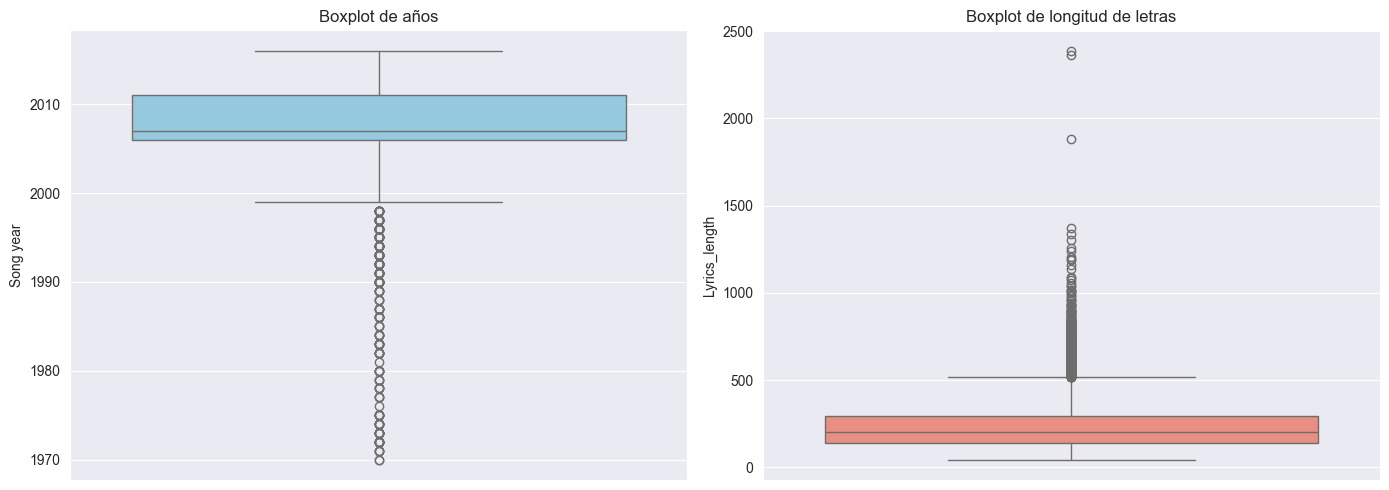

In [14]:
fig, axes = plt.subplots(1,2, figsize=(14,5))
sns.boxplot(data=df, y='Song year', ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot de años')
sns.boxplot(data=df, y='Lyrics_length', ax=axes[1], color='salmon')
axes[1].set_title('Boxplot de longitud de letras')
plt.tight_layout()
plt.show()